<a href="https://colab.research.google.com/github/Sanjeet-108/BIS_LAB/blob/main/BIS_lab_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1/100: Best Fitness = 13.611426689358401
Iteration 2/100: Best Fitness = 13.565494950273587
Iteration 3/100: Best Fitness = 13.537030235598849
Iteration 4/100: Best Fitness = 13.431782619183428
Iteration 5/100: Best Fitness = 13.431782619183428
Iteration 6/100: Best Fitness = 13.431782619183428
Iteration 7/100: Best Fitness = 13.397420581858812
Iteration 8/100: Best Fitness = 13.397420581858812
Iteration 9/100: Best Fitness = 13.342069010697665
Iteration 10/100: Best Fitness = 13.342069010697665
Iteration 11/100: Best Fitness = 13.342069010697665
Iteration 12/100: Best Fitness = 13.342069010697665
Iteration 13/100: Best Fitness = 7.916479582814685
Iteration 14/100: Best Fitness = 7.916479582814685
Iteration 15/100: Best Fitness = 7.916479582814685
Iteration 16/100: Best Fitness = 7.916479582814685
Iteration 17/100: Best Fitness = 7.916479582814685
Iteration 18/100: Best Fitness = 7.916479582814685
Iteration 19/100: Best Fitness = 7.916479582814685
Iteration 20/100: Best Fitne

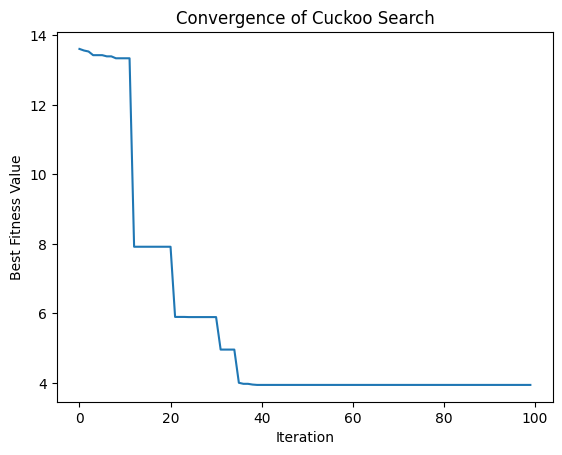


Final Best Solution:  [-1.3575507  -3.60900534 -4.69644779  2.80178754  1.12550452]
Final Best Fitness:  3.938599331904277


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Objective Function (Example: Sphere Function)
def objective_function(x):
    return np.sum(x**2)

# Initialize parameters
n = 20  # Number of nests (solutions)
dim = 5  # Dimensionality of the solution space
max_iter = 100  # Maximum number of iterations
pa = 0.25  # Probability of a nest being abandoned (discovery of a new egg)
alpha = 0.01  # Step size for generating a new solution (perturbation)

# Step 1: Initialize the population of nests
nests = np.random.uniform(-5, 5, (n, dim))  # Initialize nests with random solutions
fitness = np.array([objective_function(nest) for nest in nests])  # Evaluate fitness of initial nests
best_nest = nests[np.argmin(fitness)]  # Best solution so far
best_fitness = np.min(fitness)

# For visualization
best_fitness_history = []

# Cuckoo Search iterations
for iteration in range(max_iter):
    # 1. Generate new solutions (eggs) for each nest
    new_nests = nests + alpha * np.random.randn(n, dim)  # Perturb existing nests to generate new ones
    new_fitness = np.array([objective_function(nest) for nest in new_nests])  # Evaluate new nests

    # 2. Replace the worse nests with new solutions if the new solution is better
    mask = new_fitness < fitness  # Find nests that have improved
    nests[mask] = new_nests[mask]  # Replace the old nest with the new one
    fitness[mask] = new_fitness[mask]  # Update the fitness of the nests

    # 3. Abandon some nests (randomly replace some nests with new random solutions)
    abandoned_mask = np.random.rand(n) < pa  # Randomly decide which nests to abandon
    nests[abandoned_mask] = np.random.uniform(-5, 5, (np.sum(abandoned_mask), dim))  # Reinitialize abandoned nests
    fitness[abandoned_mask] = np.array([objective_function(nest) for nest in nests[abandoned_mask]])  # Re-evaluate

    # 4. Update the best nest (solution)
    current_best_nest = nests[np.argmin(fitness)]  # Find the current best nest
    current_best_fitness = np.min(fitness)

    if current_best_fitness < best_fitness:  # If the new solution is better, update the global best
        best_nest = current_best_nest
        best_fitness = current_best_fitness

    # Store the best fitness value for plotting
    best_fitness_history.append(best_fitness)

    # Print the progress at each iteration
    print(f"Iteration {iteration+1}/{max_iter}: Best Fitness = {best_fitness}")

# Plot the fitness values across iterations
plt.plot(best_fitness_history)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness Value')
plt.title('Convergence of Cuckoo Search')
plt.show()

# Final result
print("\nFinal Best Solution: ", best_nest)
print("Final Best Fitness: ", best_fitness)


Iteration 1/100: Best Fitness = 10023.549363787826
Iteration 2/100: Best Fitness = 8897.628491418795
Iteration 3/100: Best Fitness = 8897.628491418795
Iteration 4/100: Best Fitness = 8897.628491418795
Iteration 5/100: Best Fitness = 8897.628491418795
Iteration 6/100: Best Fitness = 8897.499028158209
Iteration 7/100: Best Fitness = 8897.499028158209
Iteration 8/100: Best Fitness = 8897.499028158209
Iteration 9/100: Best Fitness = 8897.499028158209
Iteration 10/100: Best Fitness = 8897.499028158209
Iteration 11/100: Best Fitness = 8897.499028158209
Iteration 12/100: Best Fitness = 8897.499028158209
Iteration 13/100: Best Fitness = 8897.499028158209
Iteration 14/100: Best Fitness = 8897.499028158209
Iteration 15/100: Best Fitness = 8897.499028158209
Iteration 16/100: Best Fitness = 8170.245057889136
Iteration 17/100: Best Fitness = 8170.245057889136
Iteration 18/100: Best Fitness = 8169.996648291701
Iteration 19/100: Best Fitness = 8169.752217014832
Iteration 20/100: Best Fitness = 8169.7

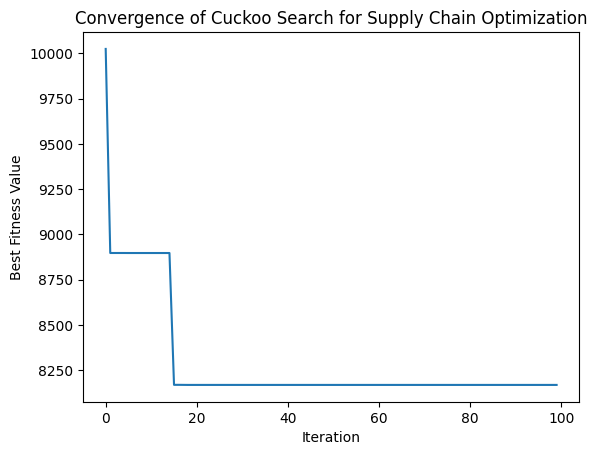


Final Best Solution (routes + inventory levels):  [71.66600878 49.8168218  77.18352003 69.22782033 47.12751546 96.57922759
 38.67459219 31.19707854 51.71009154 65.67968484 98.70698851 40.13681751
  4.01721448 30.34814716 19.72097044]
Final Best Fitness (total cost):  8169.752217014832


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Example supply chain data
# Suppose we have 3 warehouses and 4 stores
warehouses = np.array([10, 15, 20])  # Warehouse capacities
stores = np.array([8, 12, 18, 10])  # Store demands
distances = np.array([[2, 4, 3, 5],  # Distance from warehouse 1 to stores
                      [3, 6, 4, 7],  # Distance from warehouse 2 to stores
                      [4, 5, 6, 8]]) # Distance from warehouse 3 to stores

# Costs associated with transportation, inventory holding, and lead times
transport_cost_per_km = 5  # Cost per kilometer
inventory_cost_per_unit = 2  # Cost per unit of inventory held
lead_time_cost_per_unit = 3  # Cost per unit of lead time

# Objective function: transportation cost + inventory holding cost + lead time cost
def objective_function(x):
    # Extract variables from x
    routes = x[:len(warehouses) * len(stores)].reshape(len(warehouses), len(stores))
    inventory_levels = x[len(warehouses) * len(stores):len(warehouses) * len(stores) + len(warehouses)]

    # Calculate transportation cost
    transportation_cost = np.sum(routes * distances) * transport_cost_per_km

    # Calculate inventory holding cost
    inventory_cost = np.sum(inventory_levels) * inventory_cost_per_unit

    # Calculate lead time cost (simplified: proportional to inventory levels)
    lead_time_cost = np.sum(inventory_levels) * lead_time_cost_per_unit

    return transportation_cost + inventory_cost + lead_time_cost

# Cuckoo Search Parameters
n = 10  # Number of nests (solutions)
dim = len(warehouses) * len(stores) + len(warehouses)  # Dimensionality: routes and inventory levels
max_iter = 100  # Maximum number of iterations
pa = 0.25  # Probability of abandonment
alpha = 0.01  # Step size for generating new solutions

# Initialize population (nests) randomly
nests = np.random.uniform(0, 1, (n, dim))  # Initialize nests (solutions) in the range [0, 1]

# Scale the solution to appropriate ranges (e.g., capacity, routes, inventory levels)
nests[:, :len(warehouses) * len(stores)] = nests[:, :len(warehouses) * len(stores)] * 100  # Routes (scaled)
nests[:, len(warehouses) * len(stores):] = nests[:, len(warehouses) * len(stores):] * 50  # Inventory levels (scaled)

# Evaluate the fitness of initial nests
fitness = np.array([objective_function(nest) for nest in nests])
best_nest = nests[np.argmin(fitness)]  # Best solution so far
best_fitness = np.min(fitness)

# History of best fitness values for visualization
best_fitness_history = []

# Cuckoo Search iterations
for iteration in range(max_iter):
    # 1. Generate new solutions (eggs) for each nest
    new_nests = nests + alpha * np.random.randn(n, dim)  # Perturb existing nests to generate new ones
    new_nests[:, :len(warehouses) * len(stores)] = np.clip(new_nests[:, :len(warehouses) * len(stores)], 0, 100)  # Ensure valid routes
    new_nests[:, len(warehouses) * len(stores):] = np.clip(new_nests[:, len(warehouses) * len(stores):], 0, 50)  # Ensure valid inventory levels

    # Evaluate new nests
    new_fitness = np.array([objective_function(nest) for nest in new_nests])

    # 2. Replace the worse nests with new solutions if the new solution is better
    mask = new_fitness < fitness
    nests[mask] = new_nests[mask]
    fitness[mask] = new_fitness[mask]

    # 3. Abandon some nests (randomly replace some nests with new random solutions)
    abandoned_mask = np.random.rand(n) < pa
    nests[abandoned_mask] = np.random.uniform(0, 1, (np.sum(abandoned_mask), dim))  # Reinitialize abandoned nests
    nests[abandoned_mask, :len(warehouses) * len(stores)] *= 100  # Rescale the routes
    nests[abandoned_mask, len(warehouses) * len(stores):] *= 50  # Rescale the inventory levels
    fitness[abandoned_mask] = np.array([objective_function(nest) for nest in nests[abandoned_mask]])

    # 4. Update the best nest (solution)
    current_best_nest = nests[np.argmin(fitness)]
    current_best_fitness = np.min(fitness)

    if current_best_fitness < best_fitness:
        best_nest = current_best_nest
        best_fitness = current_best_fitness

    # Store the best fitness value for plotting
    best_fitness_history.append(best_fitness)

    # Print the progress at each iteration
    print(f"Iteration {iteration+1}/{max_iter}: Best Fitness = {best_fitness}")

# Plot the fitness values across iterations
plt.plot(best_fitness_history)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness Value')
plt.title('Convergence of Cuckoo Search for Supply Chain Optimization')
plt.show()

# Final result
print("\nFinal Best Solution (routes + inventory levels): ", best_nest)
print("Final Best Fitness (total cost): ", best_fitness)
